In [1]:
import pandas as pd

# Load the dataset from the CSV file

data = pd.read_csv("JKH 2022-2023.csv")
data.head()

# data1 = pd.read_csv("Abans 2022-2023.csv")
# data1.head()

# data = data1.loc[5195:]
# data.head()

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,1/3/2022,153.25,149.0,152.75,321,799594,121924661
1,1/4/2022,153.25,149.0,149.50,177,317312,47828320
2,1/5/2022,151.75,147.0,150.75,232,1557752,234256848
3,1/6/2022,152.00,148.5,151.00,189,318537,47954695
4,1/7/2022,158.25,150.0,155.50,627,3343693,512681469


In [2]:
data.columns

Index(['Day', 'High', 'Low', 'Close', 'No. of Trades', 'No. of Shares',
       'Turnover(Rs.)'],
      dtype='object')

In [3]:
# df['High'] = df['High'].astype(float)
# df['Low'] = df['Low'].astype(float)
data['No. of Trades'] = data['No. of Trades'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            293 non-null    object 
 1   High           293 non-null    float64
 2   Low            293 non-null    float64
 3   Close          293 non-null    float64
 4   No. of Trades  293 non-null    float64
 5   No. of Shares  293 non-null    int64  
 6   Turnover(Rs.)  293 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 16.1+ KB


In [4]:

# Define a function to generate the supervised dataset with lag features
def generate_supervised(data):
    supervised_df = data.copy()
    
    # Create lag columns for the "Closing" column
    for i in range(1, 13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['Close'].shift(i)
    
    # Drop rows with NaN values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    return supervised_df

# Generate the supervised dataset
supervised_df = generate_supervised(data)

# Save the resulting DataFrame to a new CSV file
supervised_df.to_csv("lagged_data.csv", index=False)

# Check the first few rows of the resulting DataFrame
print(supervised_df.head())



         Day    High    Low   Close  No. of Trades  No. of Shares  \
0  1/21/2022  162.00  159.0  161.00          295.0        1209974   
1  1/24/2022  163.75  161.0  162.00          359.0       80657771   
2  1/25/2022  163.00  160.0  160.50          245.0         192701   
3  1/26/2022  161.00  159.0  160.25          214.0         302664   
4  1/27/2022  164.75  159.5  160.75          436.0         552876   

   Turnover(Rs.)   lag_1   lag_2   lag_3   lag_4   lag_5   lag_6   lag_7  \
0      193742443  162.00  162.75  163.75  163.25  157.00  157.50  157.00   
1    12986725898  161.00  162.00  162.75  163.75  163.25  157.00  157.50   
2       30993507  162.00  161.00  162.00  162.75  163.75  163.25  157.00   
3       48562316  160.50  162.00  161.00  162.00  162.75  163.75  163.25   
4       89257535  160.25  160.50  162.00  161.00  162.00  162.75  163.75   

    lag_8  lag_9  lag_10  lag_11  lag_12  
0  155.50  151.0  150.75  149.50  152.75  
1  157.00  155.5  151.00  150.75  149.50  

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset with lag features
data = pd.read_csv("lagged_data.csv")

# Define the target variable (y) and the input features (X)
y = data['Close']
X = data.drop(['Day', 'Close'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict the stock price for future dates (e.g., 2023-04-01 to 2023-04-12)
future_dates = pd.date_range(start="2023-04-01", periods=12, freq='B')
future_features = X[-12:]  # Get the last 12 rows of features
future_predictions = model.predict(future_features)

# Create a DataFrame to store future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Closing': future_predictions})

# Print the future predictions
print(future_df)

Mean Squared Error: 0.4377578204519188
         Date  Predicted_Closing
0  2023-04-03         143.763037
1  2023-04-04         144.270907
2  2023-04-05         144.862930
3  2023-04-06         144.797807
4  2023-04-07         144.372165
5  2023-04-10         143.993628
6  2023-04-11         143.646900
7  2023-04-12         142.926869
8  2023-04-13         140.820145
9  2023-04-14         141.542415
10 2023-04-17         140.668162
11 2023-04-18         140.249945


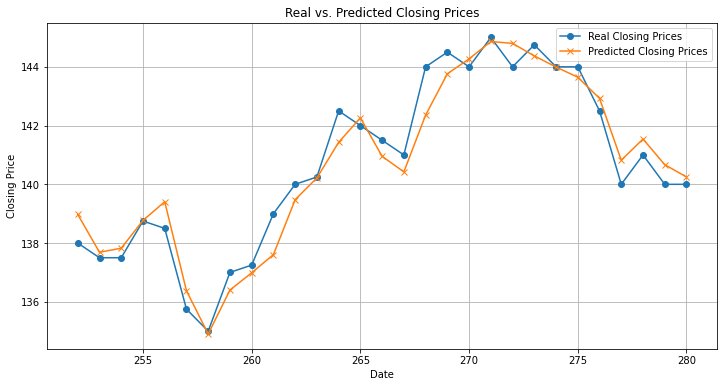

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the real values (y_test) against the predicted values (y_pred)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Real Closing Prices', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Closing Prices', marker='x')
plt.title("Real vs. Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate R-squared (r2)
r2 = r2_score(y_test, y_pred)
print("R-squared (r2):", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared (r2): 0.9463859428404903
Mean Squared Error (MSE): 0.4377578204519188
Mean Absolute Percentage Error (MAPE): 0.3779453119885099


In [8]:
# 0.2
# R-squared (r2): 0.9478375859049327
# Mean Squared Error (MSE): 0.47973285779353114
# Mean Absolute Percentage Error (MAPE): 0.37592486406064546